<a href="https://colab.research.google.com/github/JefNtungila/120-Data-Science-Interview-Questions/blob/master/REPL_Practical_Machine_Learning_Exercise_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REPL Practical Machine Learning Exercise



## Introduction 

This is a short exercise to test your ability to construct and evaluate machine learning models. You should produce a machine learning model and an evaluation metric.

The goal of this exercise is not to produce a state-of-the-art machine learning model. Which model you use, and how you evaluate, is up to you. The choice of model is not important (although we will assume that when you choose a model, you understand what it is and how it works).

Your solution should be simple, but sensible: you should be able to explain why it tests something of impact to the problem.We are looking to identify the sales and traffic per hour for the following month. You can use any external data you wish (PS: you might want to look for holidays and national days).

Submission: Please submit the following:



1.   A report discussing your methods
2.   All your code
3.   Any external dataset used

Please feel free to use either R, Python, or Scala, and please feel free to use any out of the box functionality. We are mainly looking for your thinking process, and how you would approach the problem.




In [ ]:
!pip install pandas-profiling==2.*

     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 3.1MB 7.8MB/s 
     |████████████████████████████████| 604kB 30.5MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 296kB 30.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=cff0a9a14f52544758a05f4d751c244fff6fc8e4b7e67cfa93d2b1c91675de99
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=81f5cfad011a4c76967c2cfca5bccc209be6c6d6416343e69a6020292854eff5
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=251a67c502302b9189bfb031dd819b98185a2515912ac4b1c8a8f

In [ ]:
# !pip install pmdarima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Data Exploration, Wrangling and Cleaning

Dataset description:


In the "training_sales.csv" you will find the hourly sales of a store in the US. The following is the description of the dataset:



*   Date: Date Time of the Sales
*   Value: Sales in cents





In the "training_traffic.csv" you will find the hourly traffic of the same store in the US. The following is the description of the dataset:

*  Date: Date Time of the Traffic
*  Value: Traffic data in person measured using store sensors


The dataset has some missing points, this is deliberate to understand your assumptions about the missing data, and how you handle them.

In [ ]:
import pandas as pd

directory = '/content/drive/My Drive/REPL_ML_Exercise/'

training_sales = pd.read_csv(f'{directory}training_Sales.csv')
training_traffic = pd.read_csv(f'{directory}training_Traffic.csv')

In [ ]:
import datetime 

def wrangle(X):

  '''
  takes in a dataframe with multiple observations per hour
  makes a copy and groups the observations by day and hour
  returns a dataframe where each record is unique per day per hour
  
  '''


  X = X.copy()
  
  X['Date'] = pd.to_datetime(X['Date'])
  X['date'] = X['Date'].dt.date
  X['hour']  = X['Date'].dt.hour
  #2015-01-01 is chosen as start date because that's when the traffic data starts
  X = X[X['date'] >= datetime.date(2015,1,1)]
  X = X.groupby(['date', 'hour']).sum()
  X = X.reset_index()
  

  return X



In [ ]:
sales_wrangled = wrangle(training_sales)
traffic_wrangled = wrangle(training_traffic)

In [ ]:
#making reference dataframe which I know contains all hours and all days rather than correcting other dfs in place

dates = []
hours = []


all_dates = pd.date_range(traffic_wrangled['date'].min(), traffic_wrangled['date'].max())

for i in all_dates:
  hours.extend(range(24)) 

for i in range(24):
  dates.extend(all_dates)

ref_df  = pd.DataFrame({'date': sorted(dates), 'hour': hours})
ref_df['date'] = ref_df['date'].dt.date




In [ ]:
#merging data into reference dataframe

sales = ref_df.merge(sales_wrangled, how = 'outer', left_on = ['date', 'hour'], right_on = ['date', 'hour'])
traffic = ref_df.merge(traffic_wrangled, how = 'outer', left_on = ['date', 'hour'], right_on = ['date', 'hour'])


In [ ]:
#splitting data into daytime and nighttime data
#this will help with the data cleaning process

sales_day = sales[(sales['hour'] > 10) & (sales['hour'] < 20)].reset_index(drop = True)
traffic_day = traffic[(traffic['hour'] > 10) & (traffic['hour'] < 20)].reset_index(drop = True)

sales_night = sales[(sales['hour'] <= 10) | (sales['hour'] >= 20)].reset_index(drop = True)
traffic_night = traffic[(traffic['hour'] <= 10) | (traffic['hour'] >= 20)].reset_index(drop = True)

For the time period 2015-01-01 to 2018-05-06 we find that from 11AM to 7PM 1% of the sales data and 1% of the traffic data is missing.

We find for the same time period and the other remaining hours that 83% of the sales data had no records and that 63% of the traffic data had no records.

We already get a sense that sales and traffic data are related.

In [ ]:
#checking percentage of data that isna

print(sales_day['Value'].isna().sum()/len(sales_day['Value']))
print(traffic_day['Value'].isna().sum()/len(traffic_day['Value']))

print(sales_night['Value'].isna().sum()/len(sales_night['Value']))
print(traffic_night['Value'].isna().sum()/len(traffic_night['Value']))

0.01127477723222404
0.008547008547008548
0.8245499181669395
0.6265139116202946


In [ ]:
#calculating relationship between sales and traffic

from scipy.stats import pearsonr, spearmanr

#it is reasonable to fill missing values during the day with the mean

print(pearsonr( sales_day['Value'].fillna(sales_day['Value'].mean()),
         traffic_day['Value'].fillna(traffic_day['Value'].mean())))

print(spearmanr( sales_day['Value'].fillna(sales_day['Value'].mean()),
         traffic_day['Value'].fillna(traffic_day['Value'].mean())))

#it is reasonable to fill missing values during the night with 0
print(pearsonr( sales_night['Value'].fillna(0),
         traffic_night['Value'].fillna(0)))

print(spearmanr(sales_night['Value'].fillna(0),
         traffic_night['Value'].fillna(0)))

(0.6032009648386354, 0.0)
SpearmanrResult(correlation=0.6753916718429953, pvalue=0.0)
(0.7299530513728407, 0.0)
SpearmanrResult(correlation=0.7790435766010375, pvalue=0.0)


We can appreciate that foot traffic and sales are heavily correlated. We appreciate very similar stadardised distributions and even more similar rankings.
We fail to reject the null hypothesis with pvalues of 0. We appreciate that our results are statistically significant.
In practical terms this means that we can deduce the amount of sales from the amount of traffic.


We use linear regression to fill in the missing data.

In [ ]:
import numpy as np

#polyfit returns coefficient of polynomial to best fit x,y whilst minimising square error
#reg stands for regression

#take in day traffic, return day sales
reg_sales_day = np.polyfit(traffic_day['Value'].fillna(traffic_day['Value'].mean()),
                                       sales_day['Value'].fillna(sales_day['Value'].mean()), 1)


#take in night traffic, return night sales
reg_sales_night = np.polyfit(traffic_night['Value'].fillna(0), sales_night['Value'].fillna(0), 1)


#take in day sales, return day traffic
reg_traffic_day = np.polyfit(sales_day['Value'].fillna(sales_day['Value'].mean()),
                                       traffic_day['Value'].fillna(traffic_day['Value'].mean()), 1)

#take in night sales, return night traffic
reg_traffic_night = np.polyfit(sales_night['Value'].fillna(0), traffic_night['Value'].fillna(0), 1)


In [ ]:
#calculating sales based on traffic and traffic based on sales using regression coefficients

sales_day['calc'] = round(traffic_day['Value'] * reg_sales_day[0] + reg_sales_day[1])
sales_night['calc'] = round(traffic_night['Value'] * reg_sales_night[0] + reg_sales_night[1])
traffic_day['calc'] = round(sales_day['Value'] * reg_traffic_day[0] + reg_traffic_day[1])
traffic_night['calc'] = round(sales_night['Value'] * reg_traffic_night[0] + reg_traffic_night[1])

In [ ]:
#creating series of clean data 
#reasonable to assume that if the instore sensors recorded no traffic and no sales were made that this is 0

sales_day['sales'] = sales_day['Value'].fillna(value = sales_day['calc']).fillna(0)
sales_night['sales'] = sales_night['Value'].fillna(value = sales_night['calc']).fillna(0)
traffic_day['traffic'] = traffic_day['Value'].fillna(value = traffic_day['calc']).fillna(0)
traffic_night['traffic'] = traffic_night['Value'].fillna(value = traffic_night['calc']).fillna(0)

In [ ]:
#creating one clean dataframe with all sales and traffic data

sales_all = pd.concat([sales_day,sales_night]).sort_values(['date', 'hour'])[['date', 'hour', 'sales']]
traffic_all = pd.concat([traffic_day,traffic_night]).sort_values(['date', 'hour'])[['date', 'hour', 'traffic']]
sales_traffic = sales_all.merge(traffic_all, how = 'outer', left_on = ['date', 'hour'], right_on = ['date', 'hour'])

We visualise the clean dataframe.

In [ ]:
#producing profile report of datframe with minimal parameter for summary

from pandas_profiling import ProfileReport

profile = ProfileReport(sales_traffic, minimal=True).to_notebook_iframe()

profile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We have a look at our time series.


We immidiately appreciate periodic human behaviour.


This is both true for traffic and sales over time.



CPU times: user 1.69 s, sys: 3.97 ms, total: 1.69 s
Wall time: 1.69 s


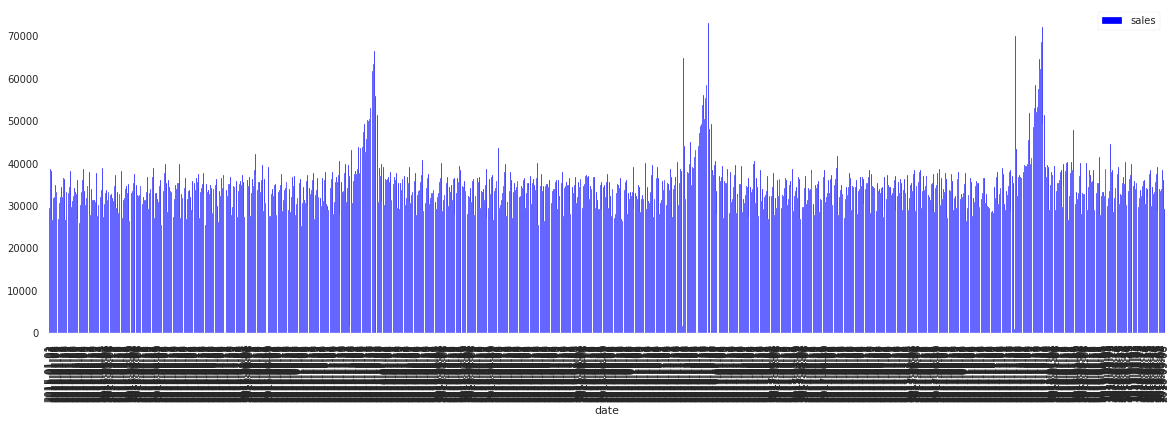

In [ ]:
%%time

#looking at historical data of sales

sales_traffic.groupby('date').sum().reset_index().plot.bar(x='date', y='sales', color = 'blue', width=0.9, figsize=(20,6));

CPU times: user 1.71 s, sys: 16.7 ms, total: 1.73 s
Wall time: 1.73 s


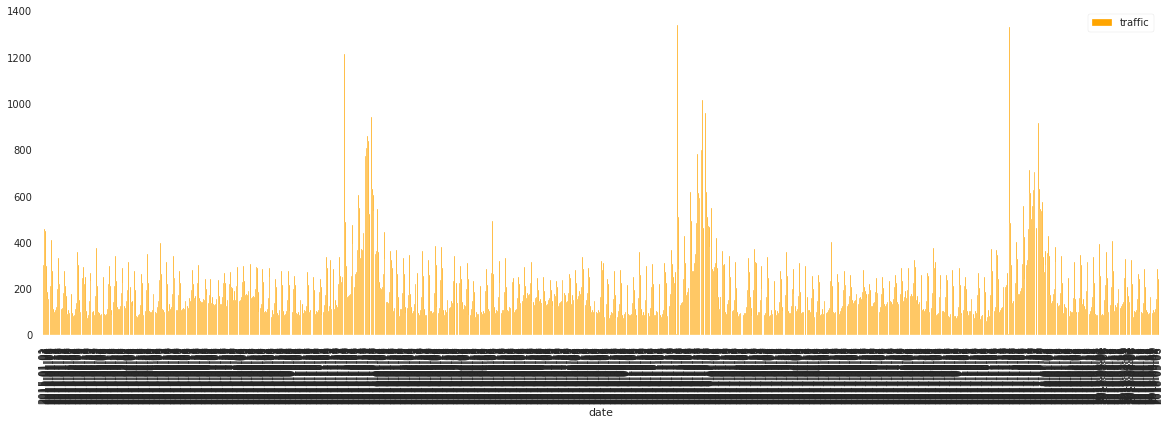

In [ ]:
%%time

#looking at historical data of traffic

sales_traffic.groupby('date').sum().reset_index().plot.bar(x='date', y='traffic', color = 'orange', width=0.9, figsize=(20,6));

The graphs above shows that the data is probably cyclical. Time series assume that the variables of the time series are stationary i.e.


*   The mean is constant
*   The variance is constant
*   The autocorrolation is constant (a copy of one cycle of the time series has a constant factor to another copy of the time series)

Time series quickly go wrong when generalising to data with non constant variables.


We will statistically prove that the data is stationary i.e. there is autocorrelation using Dickey-Fuller test. The null-hypothesis is that the time series is non-stationary. 

In [ ]:
from statsmodels.tsa.stattools import adfuller

#calculating Dickey-Fuller statististic to verify whether or not data is stationary


dickey_fuller_sales = adfuller(sales_traffic['sales'])[0]
p_value_dickey_fuller_sales = adfuller(sales_traffic['sales'])[1]

dickey_fuller_traffic = adfuller(sales_traffic['traffic'])[0]
p_value_dickey_fuller_traffic = adfuller(sales_traffic['traffic'])[1]

print(f' The augmented Dickey-Fuller statistic  for sales is {dickey_fuller_sales} and the p-value is {p_value_dickey_fuller_sales}')
print(f' The augmented Dickey-Fuller statistic for traffic is {dickey_fuller_traffic} and the p-value is {p_value_dickey_fuller_traffic}')

 The augmented Dickey-Fuller statistic  for sales is -15.545603748909507 and the p-value is 2.131893963749772e-28
 The augmented Dickey-Fuller statistic for traffic is -14.888898810869968 and the p-value is 1.5681845940418198e-27


The p-value is 0 so we fail to reject the null hypothesis stating that this time series is not stationary. This time series is stationary and time series models will work well with this data.

## Time Series Analysis

### Train-Test Split

In [ ]:

#splitting dataframe into train and test dataframes
#Using the standard 0.8/0.2 train to test ratio
#this is ok cause test is 243 days and we will be forecasting 30 days

dates = sales_traffic['date'].unique()
print(len(dates))

cutoff = round(len(dates)*0.8)
print(cutoff)

train = sales_traffic[sales_traffic['date'] <= dates[cutoff]]
test = sales_traffic[sales_traffic['date'] > dates[cutoff]]

print(train.shape, test.shape)

total_test_days = len(test['date'].unique())

print(f'the testing data has {total_test_days} amount of days')


1222
978
(23496, 4) (5832, 4)
the testing data has 243 amount of days


### Baseline: Historical Mean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


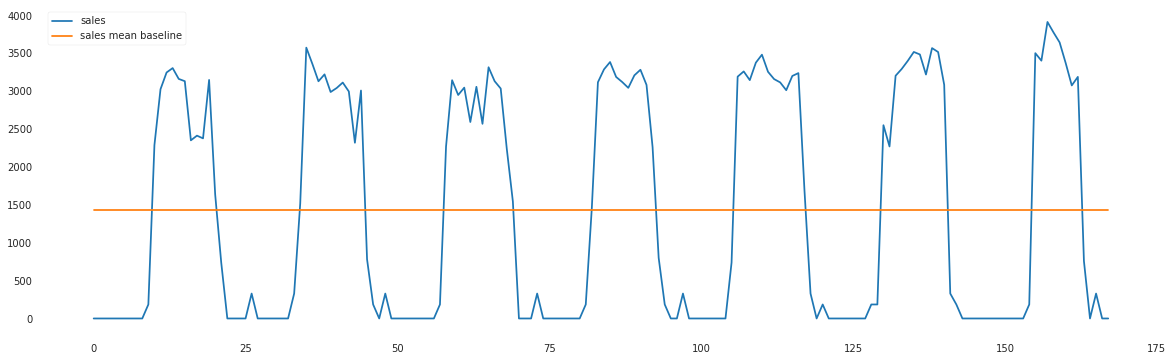

In [ ]:
#getting the historical mean of sales and using that as a constant to forecast the 243 days
#plotting only last week or last 168 hours

train['sales mean'] = train['sales'].mean()
test['sales mean baseline'] = train['sales mean'][: test.shape[0]].tolist()


test[-168:].reset_index()['sales'].plot(figsize = (20,6), legend=True)
test[-168:].reset_index()['sales mean baseline'].plot(legend = True);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


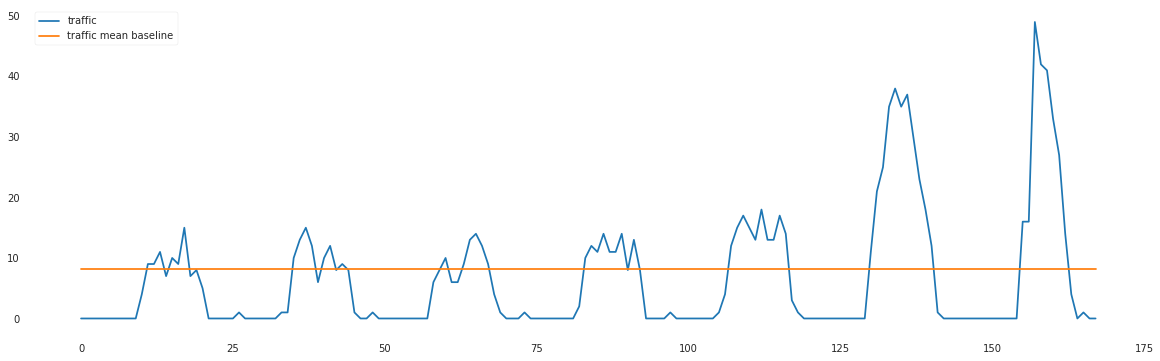

In [ ]:
#getting the historical mean of sales and using that as a constant to forecast the 243 days
#plotting only last week or last 168 hours

train['traffic mean'] = train['traffic'].mean()
test['traffic mean baseline'] = train['traffic mean'][: test.shape[0]].tolist()


test[-168:].reset_index()['traffic'].plot(figsize = (20,6), legend=True)
test[-168:].reset_index()['traffic mean baseline'].plot(legend = True);

### Historical Hourly Median

In [ ]:
def timeseries_creator(days, n):

  '''
  takes in a day which consists of historical statistics 
  takes in the amount of days the predictions want to be made for
  returns a series of days
  '''
  
  series_of_days = []

  for i in range (n):
      series_of_days.extend(days)

  return series_of_days


In [ ]:
#making hist_median_pred for 243 days on train data to compare vs our testing data

day_sales = train.groupby('hour').median().reset_index()['sales'].tolist()
hist_median_sales_pred = timeseries_creator(day_sales, 243)
test['historical hourly median sales'] = hist_median_sales_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


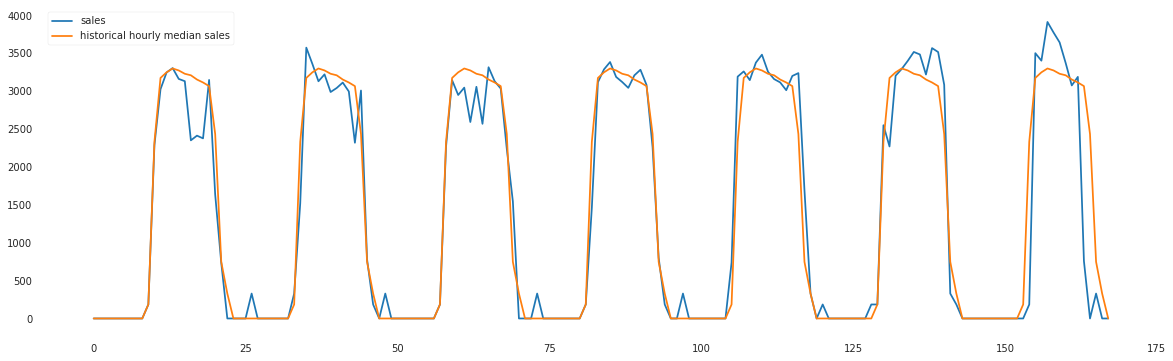

In [ ]:
#plotting the last weeks worth of data which is equal to 168hrs

test[-168:].reset_index()['sales'].plot(figsize = (20,6), legend=True)
test[-168:].reset_index()['historical hourly median sales'].plot(legend = True);

In [ ]:
#making hist_median_pred for 243 days on train data to compare vs our testing data

day_traffic = train.groupby('hour').median().reset_index()['traffic'].tolist()
hist_median_traffic_pred = timeseries_creator(day_traffic, 243)
test['historical hourly median traffic'] = hist_median_traffic_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


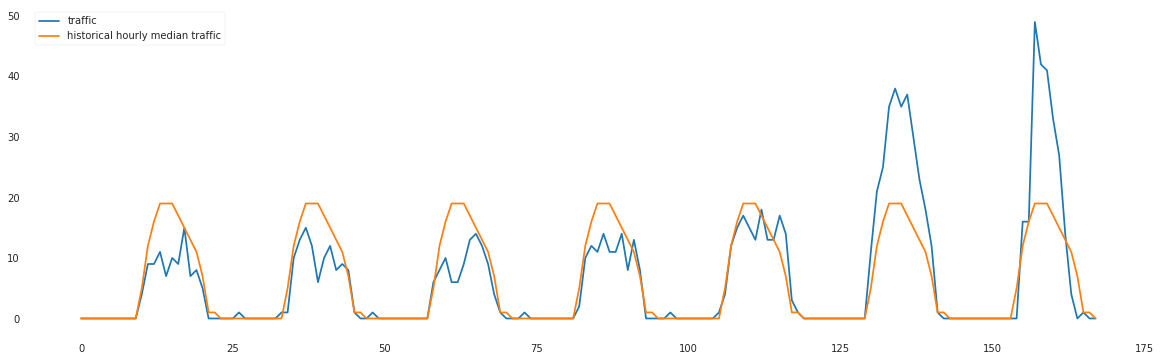

In [ ]:
#plotting the last weeks worth of data which is equal to 168hrs

test[-168:].reset_index()['traffic'].plot(figsize = (20,6), legend=True)
test[-168:].reset_index()['historical hourly median traffic'].plot(legend = True);

### Facebook Prophet

In [ ]:
from fbprophet import Prophet

def facebook_prophet(X):

  '''
  takes in dataframe with time series data and return facebooks prophet precition in a series format

  '''

  X = X.copy()

  #formatting data into facebook prophet format
  X.columns = ['ds', 'y']

  #instantiating the model
  m = Prophet()
  
  #fitting the model to the data
  m.fit(X)

  #creating time series that needs to be forecasted and setting frequency to hour
  future = m.make_future_dataframe(periods=(len(test)), freq='H')

  #making prophet forecast of all the test data + required period(here len test) and saving the results inplace
  forecast = m.predict(future)

  #prophet appends the pred to the dataframe in the yhat column
  #resetting index to lose the indeces taken from the train data

  facebook_pred = forecast.tail(len(test)).reset_index()['yhat']

  return facebook_pred

In [ ]:
 %%time
 
 test['facebook prophet sales forecast'] = facebook_prophet(train[['date', 'sales']]).to_list()
 test['facebook prophet traffic forecast'] = facebook_prophet(train[['date', 'traffic']]).to_list()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CPU times: user 51.4 s, sys: 21.2 s, total: 1min 12s
Wall time: 48.8 s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



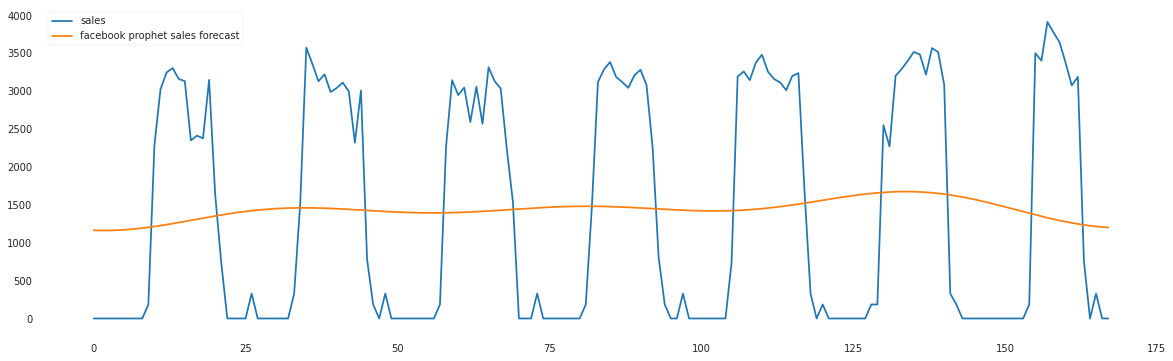

In [ ]:
#plotting the last weeks worth of data which is equal to 168hrs

test[-168:].reset_index()['sales'].plot(figsize = (20,6), legend=True)
test[-168:].reset_index()['facebook prophet sales forecast'].plot(legend = True);

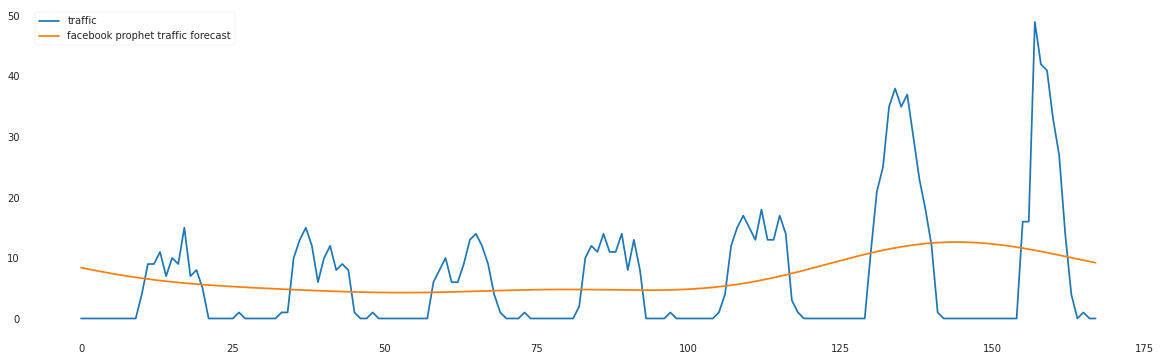

In [ ]:
#plotting the last weeks worth of data which is equal to 168hrs

test[-168:].reset_index()['traffic'].plot(figsize = (20,6), legend=True)
test[-168:].reset_index()['facebook prophet traffic forecast'].plot(legend = True);

###  SARIMA

Per the formula SARIMA(p,d,q)x(P,D,Q,s), the parameters for these types of models are as follows:
* p and seasonal P: indicate number of autoregressive terms (lags of the stationarized series)
* d and seasonal D: indicate differencing that must be done to stationarize series
* q and seasonal Q: indicate number of moving average terms (lags of the forecast errors)
* m: indicates periodicity of the time series (4 for quarterly, 12 for yearly)

We use the computationally expensive auto-arima which uses cross validation to find these parameters which we then put into the considerably faster sarima to make predictions.

 [For sales and traffic we find SARIMAX(2, 0, 2)x(2, 0, 2, 12)](https://drive.google.com/file/d/1oAYC1beChYTGWPyGB985xB2__skP_UAH/view?usp=sharing)	






In [ ]:
#pip install pmdarima above when running this cell
# from pmdarima import auto_arima 

# #using only last 5000hours +/- 6 months of data to get the parameters for memory management
# auto_arima(train['sales'][-5000: ], seasonal=True, m=12).summary()

In [ ]:
#pip install pmdarima above when running this cell
#using only last 5000hours +/- 6 months of data to get the parameters for memory management
# auto_arima(train['traffic'][-5000: ], seasonal=True, m=12).summary()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima(x):

  '''
  takes in time series data and returns sarima in a series format

  '''
  model = SARIMAX(x, order = (2,0,2), seasonal_order = (2,0,2,12))
  sarima_result = model.fit()
  sarima_pred = sarima_result.predict(start = 0, end = len(test)-1)

  return sarima_pred

In [ ]:
 %%time
 
 test['sarima sales forecast'] = sarima(train['sales']).to_list()
 test['sarima traffic forecast'] = sarima(train['traffic']).to_list()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CPU times: user 15min 33s, sys: 2min 56s, total: 18min 29s
Wall time: 15min


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



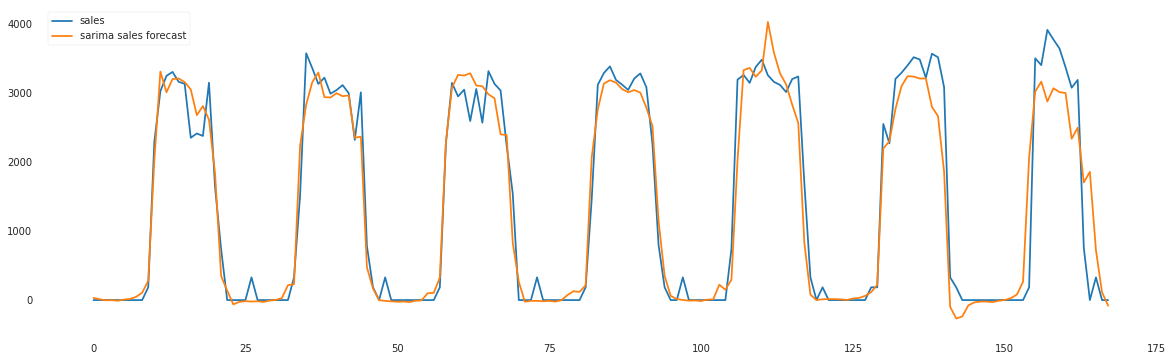

In [ ]:
#plotting the last weeks worth of data which is equal to 168hrs

test[-168:].reset_index()['sales'].plot(figsize = (20,6), legend=True)
test[-168:].reset_index()['sarima sales forecast'].plot(legend = True);

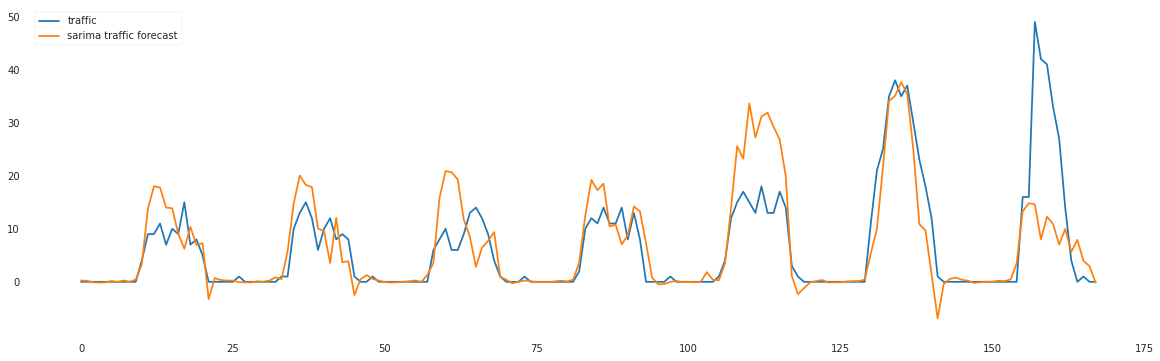

In [ ]:
#plotting the last weeks worth of data which is equal to 168hrs

test[-168:].reset_index()['traffic'].plot(figsize = (20,6), legend=True)
test[-168:].reset_index()['sarima traffic forecast'].plot(legend = True);

### LSTM

In [ ]:
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
#the code obtained from the link above and used in the function below formats the time series into what LSTM wants


from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

n_features = 1
n_steps = 12

def lstm_formatter(sequence, n_steps):

    '''
    formats the time series into what LSTM wants
    sequence of points pointing to one unit of time
    return array of those sequences and vector of unit of points

    '''

    X = []
    y = []

    for i in range(len(sequence)):
      # find the end of this pattern
      end_ix = i + n_steps

      # check if we are beyond the sequence
      if end_ix > len(sequence)-1:
        break

      # gather input and output parts of the pattern
      seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
      X.append(seq_x)
      y.append(seq_y)


    X = np.asarray(X)
    y = np.asarray(y)
    
    return X, y

Using TensorFlow backend.


In [ ]:


def lstm(x1, x2):

    '''

    x1 is the time series to train the lstm model on
    x2 is the formatted time series to be forecasted
    x2 needs to include n_steps extra timesteps before the required period to be forecasted

    '''

    # split into samples
    X, y = lstm_formatter(x1, n_steps)

    # reshape from [samples, timesteps] into [samples, timesteps, features]
    # reshaping from row, column to array, row, column (going from 2D matrix to 3D array)
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # istantiate model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # fit model, but should refractor to avoid variance/overfitting
    model.fit(X, y, epochs=100, verbose=0)

    lstm_pred = model.predict(x2, verbose=0).T[0]

    return lstm_pred



In [ ]:
#getting testing data + last n_steps of training data because LSTM uses rolling n_steps to make predictions
lstm_input_sales = np.asarray(train['sales'][-n_steps:].tolist() + test['sales'].tolist())

#getting testing data into same format as training data using above function
lstm_input_sales = lstm_formatter(lstm_input_sales, n_steps)[0]

#formatting 3D array
lstm_input_sales = lstm_input_sales.reshape((lstm_input_sales.shape[0], lstm_input_sales.shape[1], n_features))

In [ ]:
#getting testing data + last n_steps of training data because LSTM uses rolling n_steps to make predictions
lstm_input_traffic = np.asarray(train['traffic'][-n_steps:].tolist() + test['traffic'].tolist())

#getting testing data into same format as training data using above function
lstm_input_traffic = lstm_formatter(lstm_input_traffic, n_steps)[0]

#formatting 3D array
lstm_input_traffic = lstm_input_traffic.reshape((lstm_input_traffic.shape[0], lstm_input_traffic.shape[1], n_features))

In [ ]:
%%time

test['lstm sales forecast'] = lstm(train['sales'], lstm_input_sales)
test['lstm traffic forecast'] = lstm(train['traffic'], lstm_input_traffic)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CPU times: user 27min 15s, sys: 56.4 s, total: 28min 11s
Wall time: 15min 47s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



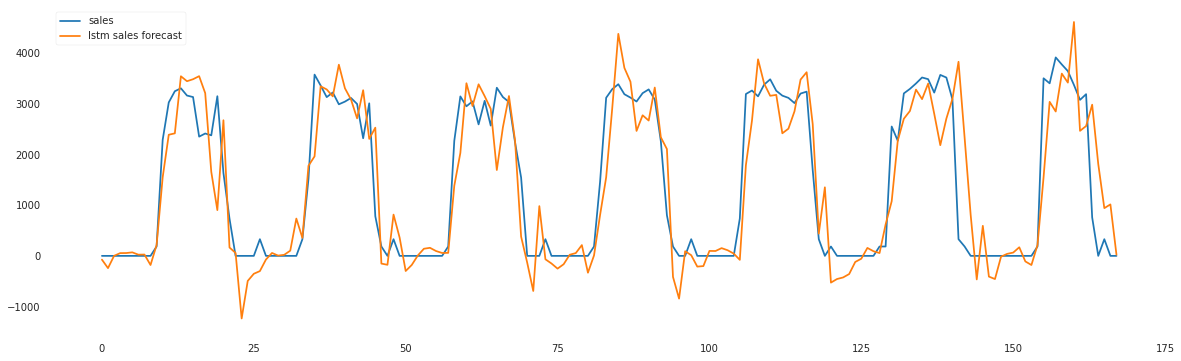

In [ ]:
#plotting the last weeks worth of data which is equal to 168hrs

test[-168:].reset_index()['sales'].plot(figsize = (20,6), legend=True)
test[-168:].reset_index()['lstm sales forecast'].plot(legend = True);

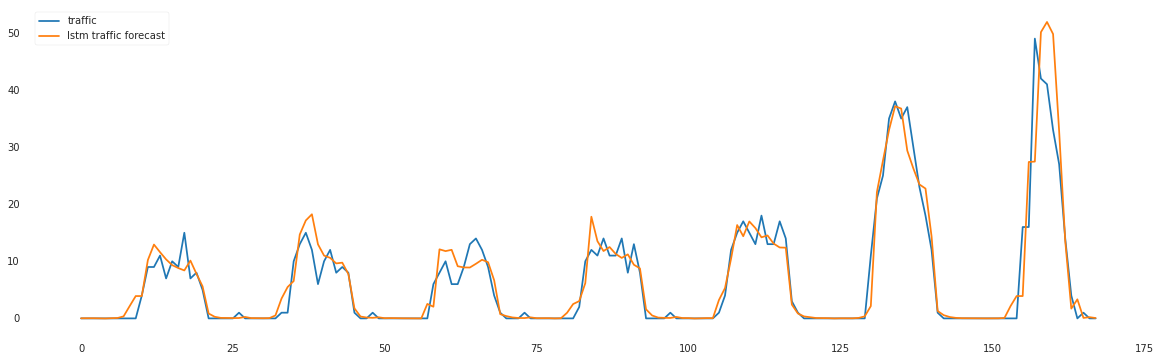

In [ ]:
#plotting the last weeks worth of data which is equal to 168hrs

test[-168:].reset_index()['traffic'].plot(figsize = (20,6), legend=True)
test[-168:].reset_index()['lstm traffic forecast'].plot(legend = True);

## RMSE Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_hist_mean_sales = round(sqrt(mean_squared_error(test['sales'], test['sales mean baseline'])))
rmse_hist_hourly_median_sales = round(sqrt(mean_squared_error(test['sales'], test['historical hourly median sales'])))
rmse_facebook_sales = round(sqrt(mean_squared_error(test['sales'], test['facebook prophet sales forecast'])))
rmse_sarima_sales = round(sqrt(mean_squared_error(test['sales'], test['sarima sales forecast'])))
rmse_lstm_sales = round(sqrt(mean_squared_error(test['sales'], test['lstm sales forecast'])))


rmse_hist_mean_traffic = round(sqrt(mean_squared_error(test['traffic'], test['traffic mean baseline'])))
rmse_hist_hourly_median_traffic = round(sqrt(mean_squared_error(test['traffic'], test['historical hourly median traffic'])))
rmse_facebook_traffic = round(sqrt(mean_squared_error(test['traffic'], test['facebook prophet traffic forecast'])))
rmse_sarima_traffic = round(sqrt(mean_squared_error(test['traffic'], test['sarima traffic forecast'])))
rmse_lstm_traffic = round(sqrt(mean_squared_error(test['traffic'], test['lstm traffic forecast'])))

print(rmse_hist_mean_sales, rmse_hist_hourly_median_sales, rmse_facebook_sales, rmse_sarima_sales, rmse_lstm_sales)
print(rmse_hist_mean_traffic, rmse_hist_hourly_median_traffic, rmse_facebook_traffic, rmse_sarima_traffic, rmse_lstm_traffic)



1570 611 1553 657 812
15 12 14 12 4


Considering ease of implementation, interpretabilty and Root Mean Square Error we chose the Historical Hourly Median as a model.  

Facebook Prophet out of the box narrowly makes better forecasts than the historical mean. SARIMA requires computationaly expensive parameter calculation. LSTM makes the most accurate forecasts for traffic and comes second in forecasting sales after the Historical Hourly Median. 

Alternative model evaluation metrics are Mean Squared Error, Mean Absolute Error and Mean Absolute Percentage Error. RMSE is chosen because the error is readily interpretable as standard deviation of residuals.


## Hourly Forecast for a Month

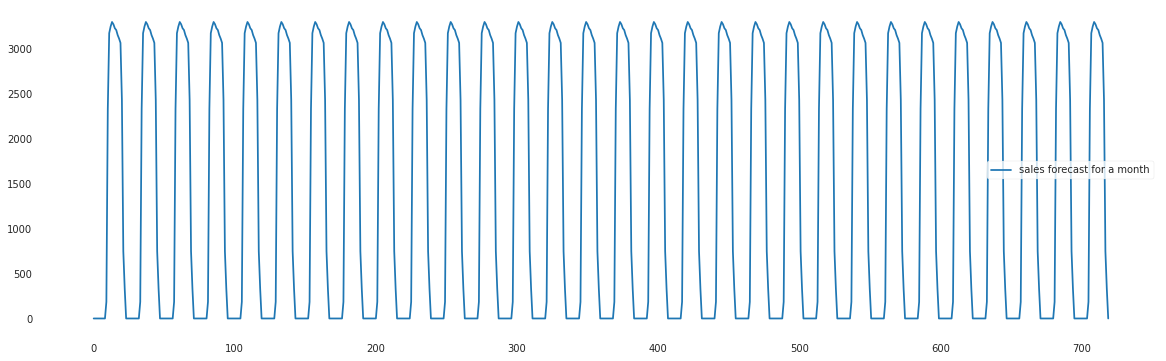

In [ ]:
month_pred_sales = timeseries_creator(day_sales, 30)
pd.Series(month_pred_sales).rename('sales forecast for a month').plot(figsize = (20,6), legend=True)


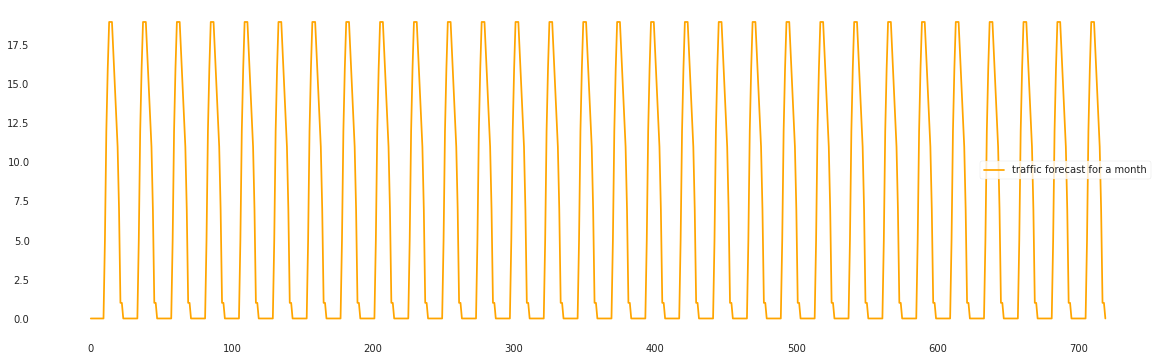

In [ ]:
month_pred_traffic = timeseries_creator(day_traffic, 30)
pd.Series(month_pred_traffic).rename('traffic forecast for a month').plot(figsize = (20,6), legend=True, color = 'orange')
